## PCA on filtered H841 variant data
- filter dropkick scores
- filter out MT and ribosomal (RP) genes
- then run PCA and get loadings

In [1]:
import os
import sys
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dropkick as dk
import cellrank as cr
import scanorama
from mazebox_filter import dropkick_filter, dropkick_recipe, doublet_detections

### Read Data

In [2]:
MTX_DIR = '/mnt/monica/quaranta2/Sequence_data_from_VANTAGE/CW-AW_data/processed_data_Qi_Liu'
sample_names = os.listdir(MTX_DIR)
sample_names.sort()
sample_names = sample_names[2:12]

In [3]:
# H841 - samples[0:5]
# H841 - samples[5:10]
cache = False
cache_compression = None
samples = []

for sample in sample_names[0:5]:
    print(sample)
    s = sc.read(
        f'{MTX_DIR}/{sample}/cm_sparse/{sample}_S1_L005_counts.mtx',
        cache=cache,
        cache_compression=cache_compression,
    ).T
    
    genes = pd.read_csv(f'{MTX_DIR}/{sample}/cm_sparse/{sample}_S1_L005_features.tsv', header=None, sep='\t')
    s.var_names = genes[0]
    # s.var['gene_symbols'] = genes[1].values
    s.obs_names = pd.read_csv(f'{MTX_DIR}/{sample}/cm_sparse/{sample}_S1_L005_barcodes.tsv', header=None)[0]
    print(s)
    samples.append(s)

8056-AW-0001
AnnData object with n_obs × n_vars = 4437 × 25428
8056-AW-0002
AnnData object with n_obs × n_vars = 5994 × 24898
8056-AW-0003
AnnData object with n_obs × n_vars = 6978 × 24213
8056-AW-0004
AnnData object with n_obs × n_vars = 5188 × 25211
8056-AW-0005
AnnData object with n_obs × n_vars = 3660 × 24649


In [4]:
total_cells = 0
for i,a in enumerate(samples):
    print(sample_names[i])
    print(a.X.shape)
    total_cells += a.X.shape[0]
print("Total cells: ", total_cells)

8056-AW-0001
(4437, 25428)
8056-AW-0002
(5994, 24898)
8056-AW-0003
(6978, 24213)
8056-AW-0004
(5188, 25211)
8056-AW-0005
(3660, 24649)
Total cells:  26257


In [5]:
s1, s2, s3, s4, s5 = samples

### dropkick preprocessing and filtering

In [6]:
batch_categories = ["S1 H841_KOR", "S2 H841_RESTko", "S3 H841_Hes1ko", "S4 H841_NR0B1ko", "S5 H841_ELF3ko"]
batch_key = "AW_H841_sample"
adata = dropkick_recipe([s1, s2, s3, s4, s5], verbose=True, filter=False, batch_categories=batch_categories, batch_key=batch_key, X_final='log1p_norm', plot=False, n_hvgs=None)

Running dropkick on each sample and filtering...
Top 10 ambient genes have dropout rates between 4.553 and 18.233 percent:
	['LINC00486', 'MT-ND4', 'RP5-857K21.4', 'MT-CO3', 'MT-ND1', 'MT-CO1', 'MT-CYB', 'MT-CO2', 'MT-ND2', 'MT-RNR2']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 2653 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   13.0s finished


Chosen lambda value:
	[0.22405245]
Assigning scores and labels
Done!

Top 10 ambient genes have dropout rates between 0.651 and 4.004 percent:
	['MT-ND4', 'MT-CO3', 'MT-CO1', 'RP5-857K21.4', 'MT-ND1', 'MT-CYB', 'MT-CO2', 'MT-ND2', 'MT-RNR2', 'LINC00486']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 3509 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   16.8s finished


Chosen lambda value:
	[0.20743714]
Assigning scores and labels
Done!

Top 10 ambient genes have dropout rates between 0.717 and 3.726 percent:
	['MT-ND4', 'MT-CO3', 'MT-CO1', 'MT-CO2', 'MT-CYB', 'MT-ND1', 'RP5-857K21.4', 'MT-RNR2', 'MT-ND2', 'LINC00486']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 4063 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   12.8s finished


Chosen lambda value:
	[0.08874307]
Assigning scores and labels
Done!

Top 10 ambient genes have dropout rates between 3.296 and 9.31 percent:
	['MT-ND4', 'MT-CO3', 'RP5-857K21.4', 'MT-CO1', 'MT-ND1', 'MT-RNR2', 'MT-CO2', 'LINC00486', 'MT-CYB', 'MT-ND2']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 2937 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   16.1s finished


Chosen lambda value:
	[0.22427346]
Assigning scores and labels
Done!

Top 10 ambient genes have dropout rates between 2.486 and 9.208 percent:
	['MT-ND4', 'RP5-857K21.4', 'LINC00486', 'MT-CO3', 'MT-CO1', 'MT-RNR2', 'MT-CYB', 'MT-ND1', 'MT-CO2', 'MT-ND2']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 2425 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    8.5s finished


Chosen lambda value:
	[0.3701344]
Assigning scores and labels
Done!

AnnData object with n_obs × n_vars = 26257 × 21222
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko'
Filtering and normalizing concatenated data...
Ignoring 21 barcodes with less than 100 genes detected
AnnData object with n_obs × n_vars = 26236 × 21222
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample', 'initial_size'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko'
    layers: 'raw_counts'
Top 10 ambient genes have dropout rates between 2.489 and 7.189 percent:
	['MT-ND4', 'MT-CO3', 'RP5-857K21.4', 'LINC00486', 'MT-CO1', 'MT-ND1', 'MT-CYB', 'MT-CO2', 'MT-RNR2

In [7]:
# save pre filtered as h5ad
adata.write_h5ad('/home/monica/rna_seq/adata_H841_base.h5ad')
adata

AnnData object with n_obs × n_vars = 26236 × 21222
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    layers: 'raw_counts', 'arcsinh_norm', 'log1p_norm'

In [8]:
# save dk filtered as dk_filter
dk_filter = adata[adata.obs.dropkick_label=='True'].copy()
dk_filter.write_h5ad('/home/monica/rna_seq/adata_H841_dk_filter.h5ad')
dk_filter

AnnData object with n_obs × n_vars = 7267 × 21222
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    layers: 'raw_counts', 'arcsinh_norm', 'log1p_norm'

### MT and RP Filtering

In [9]:
# MT done in dropkick recipe
# dk_filter.var['mito'] = dk_filter.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mito'
dk_filter.var['ribo'] = dk_filter.var_names.str.startswith('RP')  # annotate the group of ribosomal genes as 'ribo'
dk_filter

AnnData object with n_obs × n_vars = 7267 × 21222
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'ribo'
    layers: 'raw_counts', 'arcsinh_norm', 'log1p_norm'

In [10]:
dk_filter.var

,dropkick_coef-S1 H841_KOR,dropkick_coef-S2 H841_RESTko,dropkick_coef-S3 H841_Hes1ko,dropkick_coef-S4 H841_NR0B1ko,dropkick_coef-S5 H841_ELF3ko,mito,pct_dropout_by_counts,ambient,n_cells_by_counts,mean_counts,log1p_mean_counts,total_counts,log1p_total_counts,mean,std,ribo
MT-ND4,NaN,NaN,NaN,NaN,NaN,True,2.488946,True,25583,68.110764,4.235711,1786954.0,14.396024,2.526982,0.798092,False
MT-CO3,NaN,NaN,NaN,NaN,-0.106861,True,3.567617,True,25300,67.035065,4.220023,1758732.0,14.380104,2.460904,0.811875,False
RP5-857K21.4,NaN,NaN,NaN,-0.044282,NaN,False,3.643848,True,25280,66.074631,4.205806,1733534.0,14.365673,2.351727,0.775105,True
LINC00486,NaN,0.001886,NaN,0.000000,NaN,False,4.669157,True,25011,35.025612,3.584230,918932.0,13.730968,1.671391,0.506834,False
MT-CO1,NaN,NaN,-0.383693,-0.202668,-0.091681,True,4.833054,True,24968,54.183754,4.010669,1421565.0,14.167270,2.257679,0.816281,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-98O2.1,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000022,0.002287,True
MS4A8,0.0,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000056,0.008179,False
RP11-222G7.2,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000030,0.004110,True
LINC00616,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000010,0.001077,False


`.obsm` matrices must length equal to the number of observations as `.n_obs` and `.varm` matrices must length equal to `.n_vars`. They can each independently have different number of dimensions.

In [11]:
# subset the dk_filter to keep non MT and RP as mt_rp_filter
mt_filter = dk_filter[:, dk_filter.var['mito']==False]
mt_filter.var

,dropkick_coef-S1 H841_KOR,dropkick_coef-S2 H841_RESTko,dropkick_coef-S3 H841_Hes1ko,dropkick_coef-S4 H841_NR0B1ko,dropkick_coef-S5 H841_ELF3ko,mito,pct_dropout_by_counts,ambient,n_cells_by_counts,mean_counts,log1p_mean_counts,total_counts,log1p_total_counts,mean,std,ribo
RP5-857K21.4,NaN,NaN,NaN,-0.044282,NaN,False,3.643848,True,25280,66.074631,4.205806,1733534.0,14.365673,2.351727,0.775105,True
LINC00486,NaN,0.001886,NaN,0.000000,NaN,False,4.669157,True,25011,35.025612,3.584230,918932.0,13.730968,1.671391,0.506834,False
EEF1A1,NaN,0.090661,NaN,NaN,0.119841,False,23.288611,False,20126,13.145601,2.649404,344888.0,12.750978,0.855062,0.580776,False
RPS12,NaN,0.196890,NaN,NaN,NaN,False,28.232200,False,18829,12.562243,2.607290,329583.0,12.705586,0.766329,0.579667,True
ACTG1,NaN,NaN,NaN,NaN,0.031706,False,28.540936,False,18748,10.647241,2.455069,279341.0,12.540192,0.733609,0.572038,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-98O2.1,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000022,0.002287,True
MS4A8,0.0,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000056,0.008179,False
RP11-222G7.2,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000030,0.004110,True
LINC00616,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000010,0.001077,False


In [12]:
mt_rp_filter = mt_filter[:, mt_filter.var['ribo']==False]
mt_rp_filter.var

,dropkick_coef-S1 H841_KOR,dropkick_coef-S2 H841_RESTko,dropkick_coef-S3 H841_Hes1ko,dropkick_coef-S4 H841_NR0B1ko,dropkick_coef-S5 H841_ELF3ko,mito,pct_dropout_by_counts,ambient,n_cells_by_counts,mean_counts,log1p_mean_counts,total_counts,log1p_total_counts,mean,std,ribo
LINC00486,NaN,0.001886,NaN,0.0,NaN,False,4.669157,True,25011,35.025612,3.584230,918932.0,13.730968,1.671391,0.506834,False
EEF1A1,NaN,0.090661,NaN,NaN,0.119841,False,23.288611,False,20126,13.145601,2.649404,344888.0,12.750978,0.855062,0.580776,False
ACTG1,NaN,NaN,NaN,NaN,0.031706,False,28.540936,False,18748,10.647241,2.455069,279341.0,12.540192,0.733609,0.572038,False
STEAP1B,NaN,NaN,NaN,NaN,NaN,False,30.240890,False,18302,9.387940,2.340646,246302.0,12.414318,0.677655,0.541628,False
TMSB4X,0.014996,0.000000,NaN,0.0,NaN,False,33.991462,False,17318,7.136949,2.096415,187245.0,12.140179,0.592707,0.548842,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WISP1,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000014,0.001199,False
CD1B,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000022,0.002231,False
MS4A8,0.000000,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000056,0.008179,False
LINC00616,NaN,NaN,NaN,NaN,NaN,False,99.980942,False,5,0.000191,0.000191,5.0,1.791759,0.000010,0.001077,False


In [13]:
# save as h5ad
mt_rp_filter.write_h5ad('/home/monica/rna_seq/adata_H841_mt_rp_filter.h5ad')

In [14]:
mt_rp_filter.n_vars

18030

### PCA

In [15]:
# run pca
sc.tl.pca(mt_rp_filter, use_highly_variable=False)
mt_rp_filter

AnnData object with n_obs × n_vars = 7267 × 18030
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'ribo'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts', 'arcsinh_norm', 'log1p_norm'

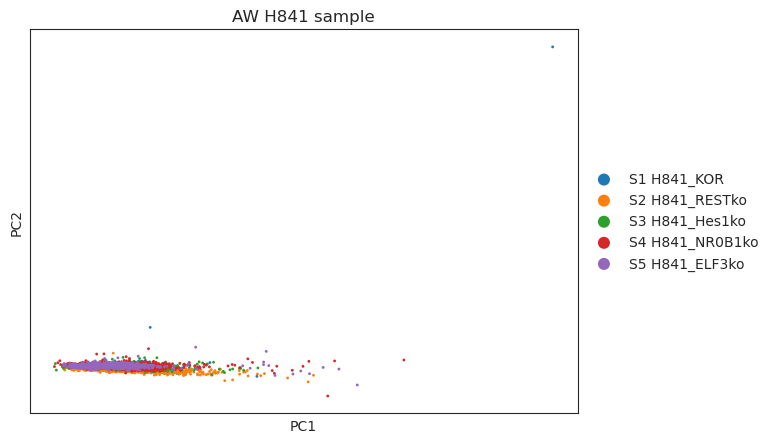

In [16]:
sc.pl.scatter(mt_rp_filter, basis='pca',color='AW_H841_sample')

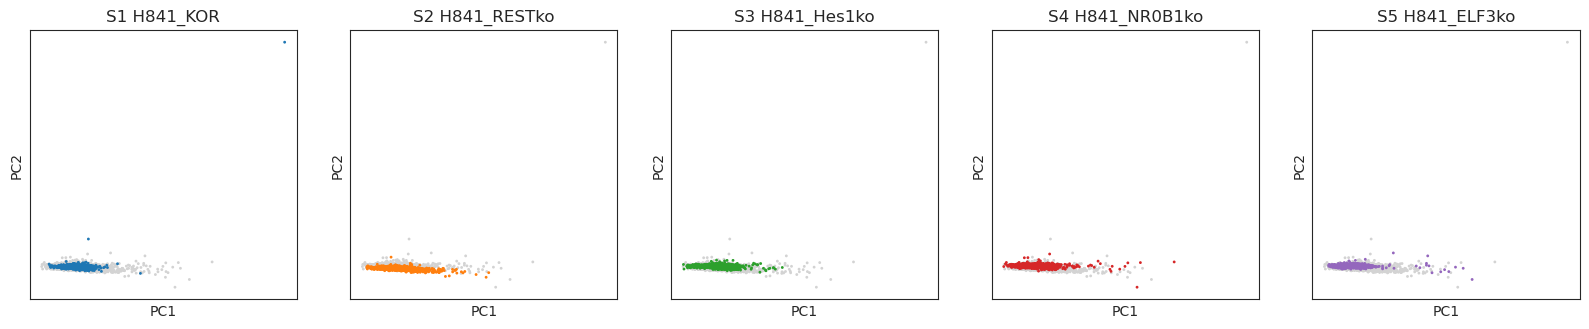

In [17]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,3.5))
ax1_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_H841_sample'], groups='S1 H841_KOR', ax=ax1, show=False, title=['S1 H841_KOR'], legend_loc='none')
ax2_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_H841_sample'], groups='S2 H841_RESTko', ax=ax2, show=False, title=['S2 H841_RESTko'], legend_loc='none')
ax3_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_H841_sample'], groups='S3 H841_Hes1ko', ax=ax3, show=False, title=['S3 H841_Hes1ko'], legend_loc='none')
ax4_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_H841_sample'], groups='S4 H841_NR0B1ko', ax=ax4, show=False, title=['S4 H841_NR0B1ko'], legend_loc='none')
ax5_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_H841_sample'], groups='S5 H841_ELF3ko', ax=ax5, show=False, title=['S5 H841_ELF3ko'], legend_loc='none')

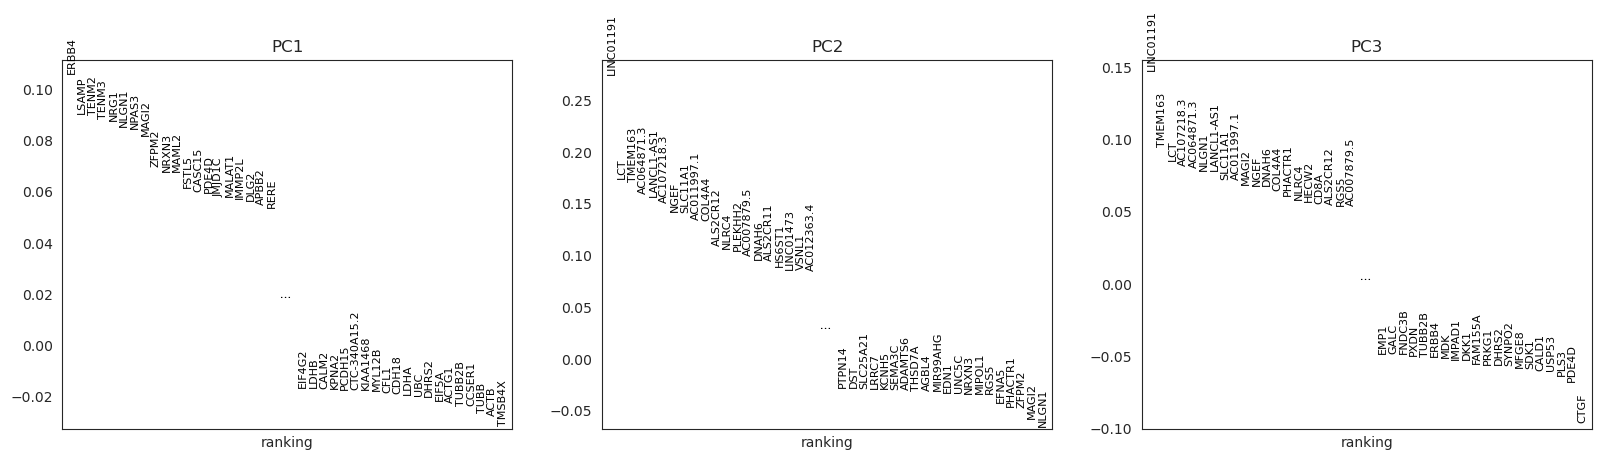

In [18]:
sc.pl.pca_loadings(mt_rp_filter, n_points=40, save="_H841_mt_rp_filter.png")

In [19]:
mt_rp_filter.varm['PCs'].shape

(18030, 50)

**KDE Plots**

In [20]:
pca_df = sc.get.obs_df(
        mt_rp_filter,
        keys=['AW_H841_sample'],
        obsm_keys=[("X_pca", 0), ("X_pca", 1)])
pca_df

,AW_H841_sample,X_pca-0,X_pca-1
TGATTTACCCTCAACGTGG-S1 H841_KOR,S1 H841_KOR,-1.403223,-1.209926
GACGAATAATCTTGGTGT-S1 H841_KOR,S1 H841_KOR,-2.938621,0.974908
TTGCATATGGTTTCTC-S1 H841_KOR,S1 H841_KOR,-4.563627,-0.213498
TGACGGGTAGTGACAGATA-S1 H841_KOR,S1 H841_KOR,-1.383194,-0.567453
TTGCATATCCACATTA-S1 H841_KOR,S1 H841_KOR,-2.992293,0.107801
...,...,...,...
AATGCGGATACTAGGAT-S5 H841_ELF3ko,S5 H841_ELF3ko,0.892207,1.603144
TTCGGCCTAAACTGGT-S5 H841_ELF3ko,S5 H841_ELF3ko,3.772431,1.942863
ATTTGGGAGCGTCAGCA-S5 H841_ELF3ko,S5 H841_ELF3ko,8.684888,-1.505752
AGGCAACGTACAAACT-S5 H841_ELF3ko,S5 H841_ELF3ko,-1.624799,-0.535378


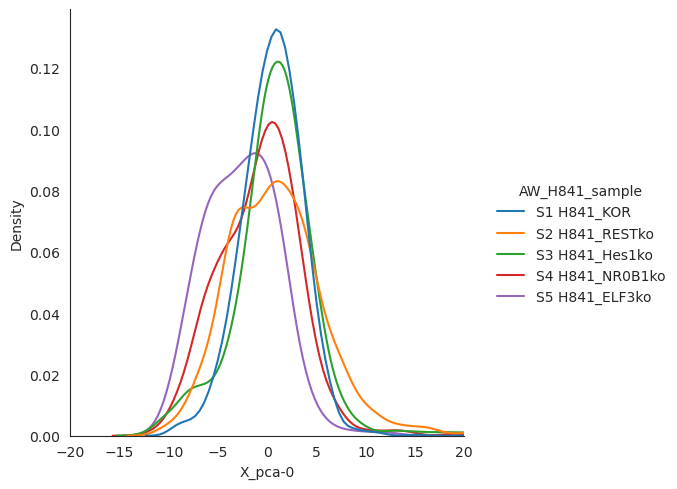

In [23]:
fig2 = sns.displot(pca_df, x='X_pca-0', hue='AW_H841_sample', kind="kde", common_norm=False, facet_kws=dict(sharex=True, xlim=(-20, 20)))
fig2.savefig("/home/monica/git-repos/tempo_code/rna_seq/figures/H841_mt_rp_filter_PC1.png")

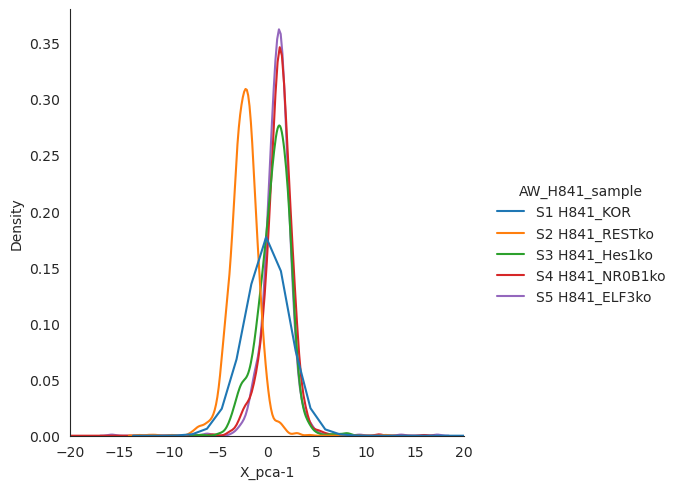

In [25]:
fig3 = sns.displot(pca_df, x='X_pca-1', hue='AW_H841_sample', kind="kde", common_norm=False, facet_kws=dict(sharex=True, xlim=(-20, 20)))
fig3.savefig("/home/monica/git-repos/tempo_code/rna_seq/figures/H841_mt_rp_filter_PC2.png")

---
### Filtering outlier

In [43]:
# find outlier
pca_df[pca_df['X_pca-0']==pca_df['X_pca-0'].max()]

,AW_H841_sample,X_pca-0,X_pca-1
TGCGACAGATACTCTT-S1 H841_KOR,S1 H841_KOR,75.873482,279.674927


In [44]:
pca_df[pca_df['X_pca-1']==pca_df['X_pca-1'].max()]

,AW_H841_sample,X_pca-0,X_pca-1
TGCGACAGATACTCTT-S1 H841_KOR,S1 H841_KOR,75.873482,279.674927


In [58]:
# load adata (before pca)
adata2 = sc.read_h5ad('/home/monica/rna_seq/adata_H841_mt_rp_filter.h5ad')
adata2

AnnData object with n_obs × n_vars = 7267 × 18030
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'ribo'
    layers: 'arcsinh_norm', 'log1p_norm', 'raw_counts'

In [67]:
adata2.obs_names

Index(['TGATTTACCCTCAACGTGG-S1 H841_KOR', 'GACGAATAATCTTGGTGT-S1 H841_KOR',
       'TTGCATATGGTTTCTC-S1 H841_KOR', 'TGACGGGTAGTGACAGATA-S1 H841_KOR',
       'TTGCATATCCACATTA-S1 H841_KOR', 'GTTACGATTGAGGTCT-S1 H841_KOR',
       'AAAACCTCCAGTGATGC-S1 H841_KOR', 'TCATCCTTACGCCATT-S1 H841_KOR',
       'AGAGACTATCTCAACC-S1 H841_KOR', 'TGATGTGGCTAACACTAAG-S1 H841_KOR',
       ...
       'TGAGAAGCACTTAGTCGCA-S5 H841_ELF3ko',
       'AGTATGAGTCTTCTTCG-S5 H841_ELF3ko', 'ACGGAATTTATTCCTTG-S5 H841_ELF3ko',
       'ACTACTTGTTTGAGGGT-S5 H841_ELF3ko', 'GACACGGACTACGGTAGC-S5 H841_ELF3ko',
       'AATGCGGATACTAGGAT-S5 H841_ELF3ko', 'TTCGGCCTAAACTGGT-S5 H841_ELF3ko',
       'ATTTGGGAGCGTCAGCA-S5 H841_ELF3ko', 'AGGCAACGTACAAACT-S5 H841_ELF3ko',
       'GAACTAGGATCGTCAGCA-S5 H841_ELF3ko'],
      dtype='object', length=7267)

In [76]:
# get list of obs_names
x = adata2.obs_names.tolist()
len(x)

7267

In [77]:
# remove outlier from list
x.remove('TGCGACAGATACTCTT-S1 H841_KOR')
len(x)

7266

In [79]:
# get view (anndata subset) with new list
filtered = adata2[x].copy()
filtered

AnnData object with n_obs × n_vars = 7266 × 18030
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'ribo'
    layers: 'arcsinh_norm', 'log1p_norm', 'raw_counts'

In [80]:
# run pca again
sc.tl.pca(filtered, use_highly_variable=False)
filtered

AnnData object with n_obs × n_vars = 7266 × 18030
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_H841_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 H841_KOR', 'dropkick_coef-S2 H841_RESTko', 'dropkick_coef-S3 H841_Hes1ko', 'dropkick_coef-S4 H841_NR0B1ko', 'dropkick_coef-S5 H841_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'ribo'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'arcsinh_norm', 'log1p_norm', 'raw_counts'

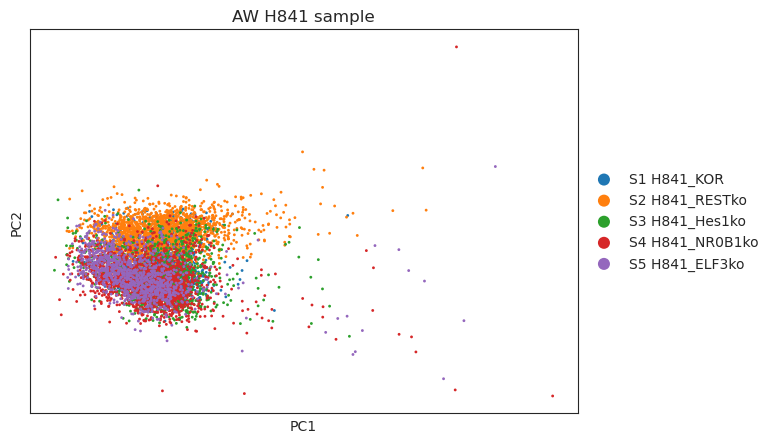

In [81]:
sc.pl.scatter(filtered, basis='pca',color='AW_H841_sample')

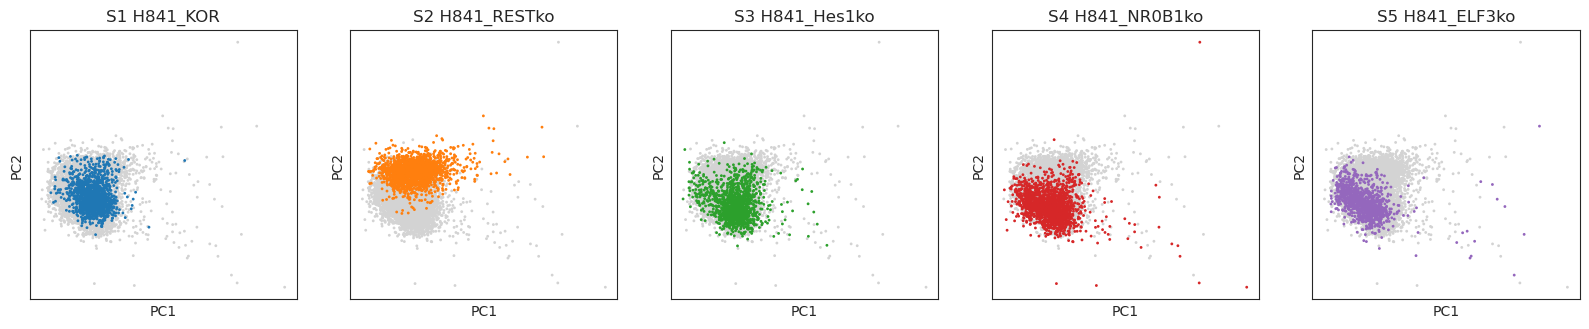

In [82]:
fig4, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,3.5))
ax1_dict = sc.pl.scatter(filtered, basis='pca',color=['AW_H841_sample'], groups='S1 H841_KOR', ax=ax1, show=False, title=['S1 H841_KOR'], legend_loc='none')
ax2_dict = sc.pl.scatter(filtered, basis='pca',color=['AW_H841_sample'], groups='S2 H841_RESTko', ax=ax2, show=False, title=['S2 H841_RESTko'], legend_loc='none')
ax3_dict = sc.pl.scatter(filtered, basis='pca',color=['AW_H841_sample'], groups='S3 H841_Hes1ko', ax=ax3, show=False, title=['S3 H841_Hes1ko'], legend_loc='none')
ax4_dict = sc.pl.scatter(filtered, basis='pca',color=['AW_H841_sample'], groups='S4 H841_NR0B1ko', ax=ax4, show=False, title=['S4 H841_NR0B1ko'], legend_loc='none')
ax5_dict = sc.pl.scatter(filtered, basis='pca',color=['AW_H841_sample'], groups='S5 H841_ELF3ko', ax=ax5, show=False, title=['S5 H841_ELF3ko'], legend_loc='none')

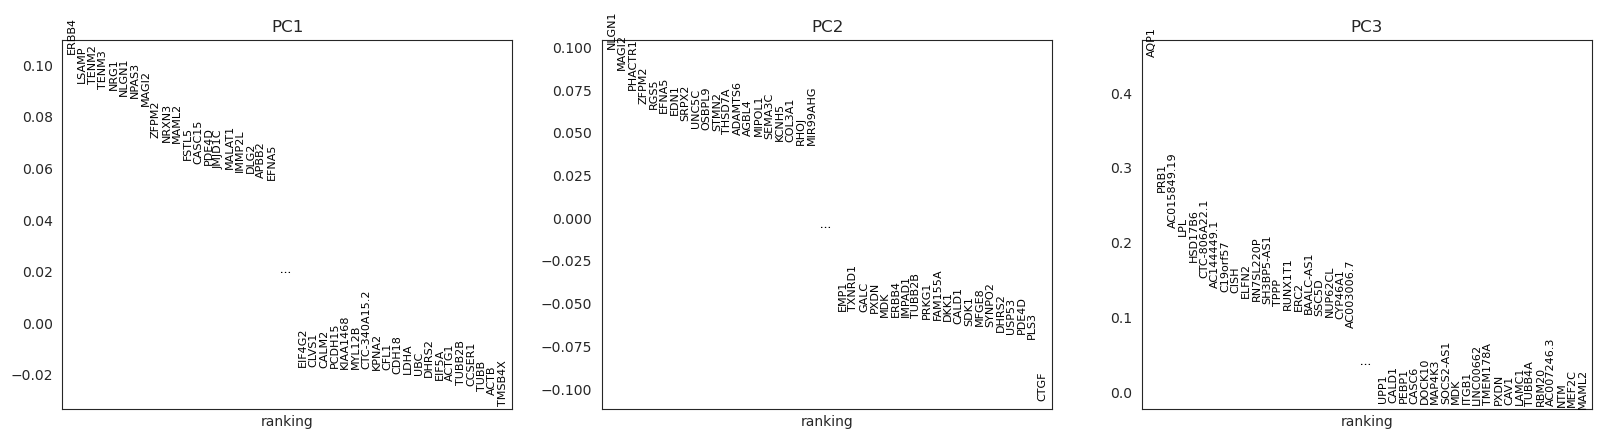

In [90]:
sc.pl.pca_loadings(filtered, n_points=40)

**KDE plots**

In [83]:
subset_df = sc.get.obs_df(
        filtered,
        keys=['AW_H841_sample'],
        obsm_keys=[("X_pca", 0), ("X_pca", 1)])
subset_df

,AW_H841_sample,X_pca-0,X_pca-1
TGATTTACCCTCAACGTGG-S1 H841_KOR,S1 H841_KOR,-1.217245,0.382459
GACGAATAATCTTGGTGT-S1 H841_KOR,S1 H841_KOR,-3.247614,3.518538
TTGCATATGGTTTCTC-S1 H841_KOR,S1 H841_KOR,-4.500346,0.451562
TGACGGGTAGTGACAGATA-S1 H841_KOR,S1 H841_KOR,-1.469436,3.194632
TTGCATATCCACATTA-S1 H841_KOR,S1 H841_KOR,-3.044096,0.734577
...,...,...,...
AATGCGGATACTAGGAT-S5 H841_ELF3ko,S5 H841_ELF3ko,0.959356,-4.849833
TTCGGCCTAAACTGGT-S5 H841_ELF3ko,S5 H841_ELF3ko,3.733516,-4.702780
ATTTGGGAGCGTCAGCA-S5 H841_ELF3ko,S5 H841_ELF3ko,8.939724,-1.399808
AGGCAACGTACAAACT-S5 H841_ELF3ko,S5 H841_ELF3ko,-1.581424,0.645489


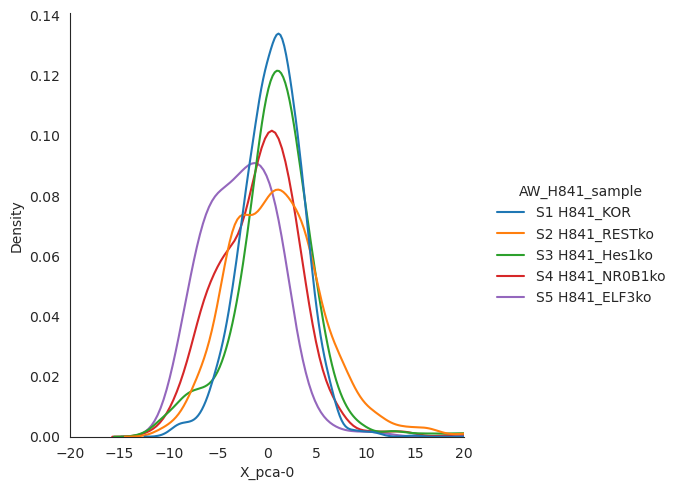

In [88]:
fig5 = sns.displot(subset_df, x='X_pca-0', hue='AW_H841_sample', kind="kde", common_norm=False, facet_kws=dict(sharex=True, xlim=(-20, 20)))

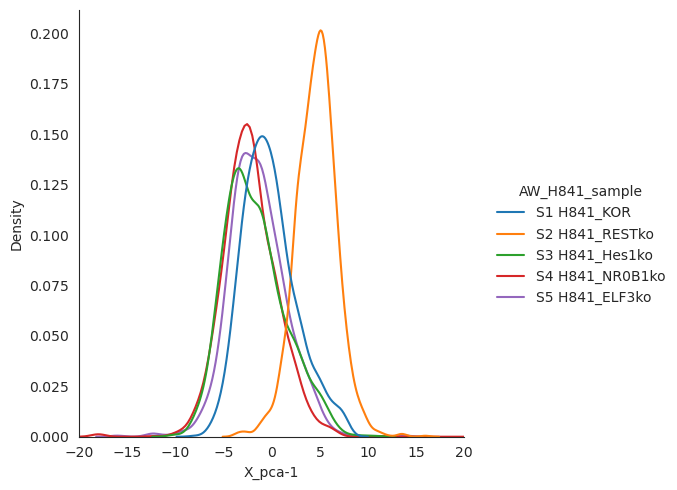

In [89]:
fig6 = sns.displot(subset_df, x='X_pca-1', hue='AW_H841_sample', kind="kde", common_norm=False, facet_kws=dict(sharex=True, xlim=(-20, 20)))